<a href="https://colab.research.google.com/github/ajaykgautam/PNamePid/blob/main/facebook_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import networkx as nx
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt


In [8]:
# Task 1: Graph Representation
def load_graph_from_file(file_path):
    # Read the text file and create a graph
    #file_path = "https://drive.google.com/file/d/1IbpWtIMyYxSUnbdb4-g_Gjb_jAKrYYBt/view?usp=drive_link"
    G = nx.Graph()
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():  # Skip empty lines
                node1, node2 = line.strip().split()  # Assuming each line contains two node IDs
                G.add_edge(node1, node2)
    return G



In [9]:
# Task 2: Feature Engineering
def calculate_node_features(G):
    # Example: Calculate degree centrality and clustering coefficient as features
    degree_centrality = dict(nx.degree_centrality(G))
    clustering_coefficient = dict(nx.clustering(G))
    node_features = pd.DataFrame({'degree_centrality': degree_centrality, 'clustering_coefficient': clustering_coefficient})
    return node_features.fillna(0)  # Handle missing values if any



In [10]:
# Task 3: Data Preparation
def prepare_data_for_clustering(node_features):
    # Scale features for clustering
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(node_features)
    return scaled_features


In [11]:
# Task 4: Exploratory Data Analysis
def explore_data_analysis(G):

# 1. Summary Statistics
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    density = nx.density(graph)

    print("Summary Statistics:")
    print(f"Number of Nodes: {num_nodes}")
    print(f"Number of Edges: {num_edges}")
    print(f"Density: {density}")

# 2. Degree Distribution
    degrees = [degree for node, degree in graph.degree()]
    degree_counts = pd.Series(degrees).value_counts().sort_index()
    plt.bar(degree_counts.index, degree_counts.values, color='skyblue')
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# 3. Visualization of the Graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=False, node_size=10, node_color='skyblue', edge_color='gray', alpha=0.6)
    plt.title('Graph Visualization')
    plt.show()

In [12]:
# Task 5: Clustering
def apply_clustering(features, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    return cluster_labels



In [18]:
# Task 6:
def evaluation_explore(G):
    # Convert the graph to a DataFrame
    df = pd.DataFrame(G.edges(), columns=['node1', 'node2'])

    # Feature Engineering (if necessary)
    node_degrees = dict(G.degree())
    nx.set_node_attributes(G, node_degrees, name='degree')

    # Calculate betweenness centrality for each node and add it as a feature
    betweenness_centrality = nx.betweenness_centrality(G)
    nx.set_node_attributes(G, betweenness_centrality, name='betweenness_centrality')

    # Print features for the first 5 nodes
    #print("First 5 nodes and their features:")
    #for node in range(5):
    #    print("Node:", node)
     #   print("Degree:", G.nodes[node]['degree'])
     #   print("Betweenness Centrality:", G.nodes[node]['betweenness_centrality'])
     #   print()

    # Clustering
    #features = None
    #num_clusters = 5
    #kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    #cluster_labels = kmeans.fit_predict(features)

    # Evaluation Metrics
    #silhouette = silhouette_score(features, cluster_labels)
    #calinski_harabasz = calinski_harabasz_score(features, cluster_labels)
    #davies_bouldin = davies_bouldin_score(features, cluster_labels)

    # Print evaluation results
    #print("Evaluation Metrics:")
    #print(f"Silhouette Score: {silhouette}")
    #print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    #print(f"Davies-Bouldin Index: {davies_bouldin}")

In [14]:
# Task 7: Interpretation and Analysis
def visualize_clusters(G, cluster_labels):
    pos = nx.spring_layout(G)  # Position nodes using a spring layout
    plt.figure(figsize=(10, 8))
    nx.draw_networkx_nodes(G, pos, node_color=cluster_labels, cmap=plt.cm.Set1, node_size=300)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title('Graph Clustering')
    plt.colorbar(label='Cluster')
    plt.show()



Drive already mounted at /content/mydata; to attempt to forcibly remount, call drive.mount("/content/mydata", force_remount=True).
Summary Statistics:
Number of Nodes: 4039
Number of Edges: 88234
Density: 0.010819963503439287


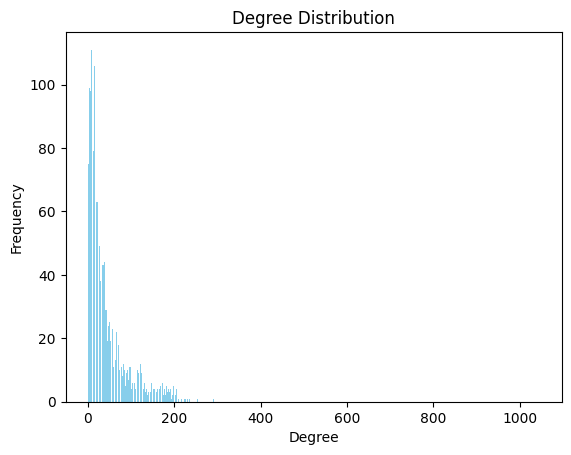

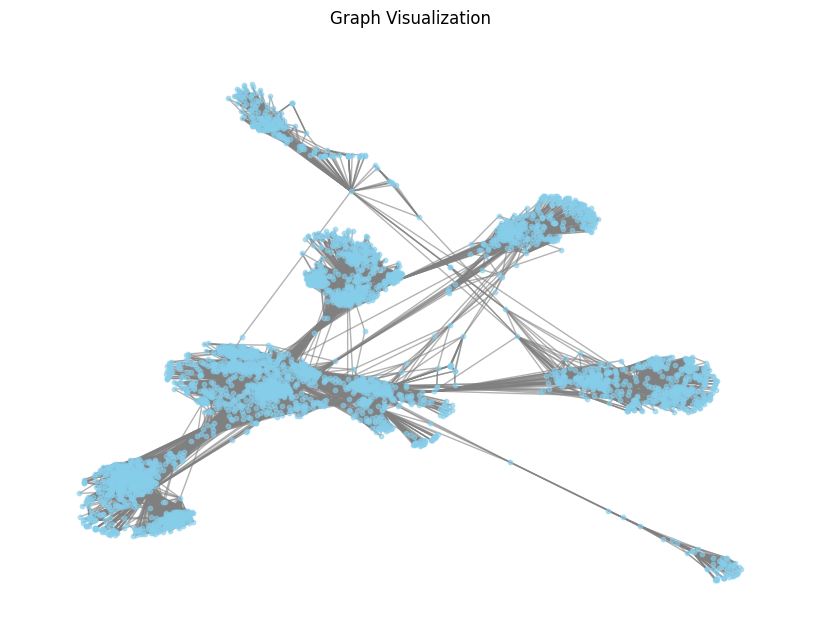

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluation Metrics:
Silhouette Score: 0.4492296351031984
Calinski-Harabasz Index: 3132.5843360313415
Davies-Bouldin Index: 0.7555709527678914


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

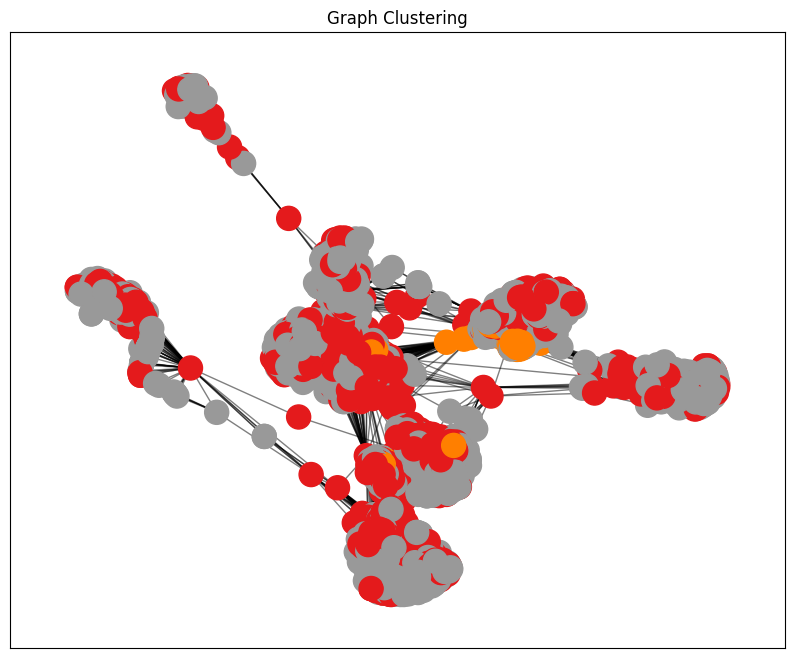

In [19]:
# Example usage:
if __name__ == "__main__":
    # Task 1: Load graph from file
    import os
    from google.colab import drive
    drive.mount('/content/mydata')
    #file_path = 'https://drive.google.com/file/d/1IbpWtIMyYxSUnbdb4-g_Gjb_jAKrYYBt/view?usp=drive_link'
    file_path = '/content/mydata/MyDrive/facebook_combined/facebook_combined.txt'
    graph = load_graph_from_file(file_path)

    # Task 2: Calculate node features
    node_features = calculate_node_features(graph)

    # Task 3: Prepare data for clustering
    features = prepare_data_for_clustering(node_features)

    # Task 4: Exploratory Data Analysis
    explore_data_analysis(graph)

    # Task 5: Clustering
    num_clusters = 3
    cluster_labels = apply_clustering(features, num_clusters)

    # Task 6: Evaluation
    evaluation_explore(graph)

    silhouette = silhouette_score(features, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(features, cluster_labels)
    davies_bouldin = davies_bouldin_score(features, cluster_labels)

    # Print evaluation results
    print("Evaluation Metrics:")
    print(f"Silhouette Score: {silhouette}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")

    # Task 7: Interpretation and Analysis
    visualize_clusters(graph, cluster_labels)

